<table>
 <tr align=left><td><img align=left src="https://i.creativecommons.org/l/by/4.0/88x31.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

In [1]:
%matplotlib inline
# from __future__ import print_function
import numpy
import matplotlib.pyplot as plt

# Mixed Equations

We now explore how we might use the methods we have analyzed and developed to solve more complex equations that do not easily fall into one of the classifications for PDEs we have studied.

We will focus here on PDEs of the form
$$
    u_t = \mathcal{A}_1(u) + \mathcal{A}_2(u) + \cdots + \mathcal{A}_N(u)
$$
where the $\mathcal{A}_j(u)$ are functions of $u$ and its derivatives (also possibly non-linear).

Since most of the methods we will discuss can be generalized from the case of only two operators $\mathcal{A}_j$ we will focus our attention on the PDE
$$
    u_t = \mathcal{A}(u) + \mathcal{B}(u).
$$
Let's now consider some examples of these types of equations.

### Example - Multidimensional Problems

We saw already how we might approach multi-dimensional problems coupled with a time derivative.  These also are considered mixed and many of the methods we will consider are applicable to multidimensional problems such as the heat equation
$$
    u_t = \kappa(u_{xx} + u_{yy})
$$
or a multidimensional hyperbolic PDE
$$
    u_t + f(u)_x + g(u)_y = 0.
$$

### Example - Reaction-Diffusion Equations

We can add another term to the heat equation which often represents a chemical reaction term (also sometimes called a source or sync term) so that we have
$$
    u_t = \kappa u_{xx} + R(u).
$$
We may want to handle the term $R(u)$ differently than the diffusion term in case it has different temporal scales, maybe is not stiff, or is difficult to solve coupled to our approach to the heat equation.

### Example - Advection-Diffusion Equations

We have also seen cases when considering numerical methods for advection that the modified equations can represent advection-diffusion systems of the form
$$
    u_t + a u_x = \kappa u_{xx}.
$$

It turns out these types of equations are much more prevalent than just this, in fact the Navier-Stokes equations are an example of a set of constrained advection-diffusion equations (constrained due to incompressibility).  We also find nonlinear hyperbolic equations with viscous terms such as
$$
    u_t + f(u)_x = \kappa u_{xx}
$$
to be common when approximating fluid dynamics in general.  The viscous Burgers equation
$$
    u_t + u u_x = \epsilon u_{xx}
$$
is another example.

### Example - Advection-Diffusion-Reaction Equations

Why not combine all of the above?
$$
    u_t + f(u)_x = \kappa u_{xx} + R(u)
$$
These types of equations are common in cases of reactive fluid flow.  Modeling combustion for instance usually involves 10-100 different reaction terms with widely disparate time scales making these very difficult problems to solve.

### Example - Advection-Dispersion

We also saw modified equations in our study of hyperbolic PDEs that contained both advective and dispersive terms.  Another example of this type of equation is the Kortweg-de Vries (KdV) equation
$$
    u_t + u u_x = \nu u_{xxx}.
$$
This equation can be derived from the Euler equations modeling incompressible fluid flow and represent a number of interesting phenomena, most notably soliton waves.  A similar equation is the nonlinear Schrödinger equation
$$
    i \Psi_t(x,t) = -\Psi_{xx}(x,t) + V(\Psi)
$$
where $V(\Psi)$ is a nonlinear potential.

### Example - Advection-Diffusion-Dispersion-Hyperdiffusion-...

The Kuramoto-Sivashinsky equation
$$
    u_t + \frac{1}{2} (u_x)^2 = -u_{xx} - u_{xxxx}
$$
is another equation of interest.  It would appear to be ill-posed and maybe even blow up due to the signs in front of the diffusion but it turns out this is not the case and appropriate damping is supplied by the transport term (the right hand-side) to stabilize the equation.

## Fully Coupled Method of Lines

The first approach we will study is one that we have introduced before.  We assume that some spatial discretization is fully applied to all the spatial terms leading to a system of equations of the form
$$
    U'(t) = F(U(t)).
$$
This approach can work and provides a lot of flexibility in terms of the order of accuracy and the stencils available but can run into problems when some terms on the right are stiff while others are not.  The best example of this is the advection-diffusion equation unless the relative strength of the advection vs. the diffusion (called the Peclet number) highly favors one term or the other.

## Fully Coupled Taylor Series Methods

We can also utilize Taylor series to construct methods for mixed equations.  Consider the Taylor expansion in time
$$
    u(x, t + \Delta t) \approx u(x, t) + \Delta t u_t + \cdots,
$$
if we replace $u_t$ with the right hand side we create the method
$$
    U^{n+1}_j = U^n_j + \Delta t (A(U^n_j) + B(U^n_j))
$$
where $A$ and $B$ are appropriately discretized versions of $\mathcal{A}$ and $\mathcal{B}$.

We can extend this to higher order by retaining more terms in the Taylor expansion.  Consider the two-dimensional hyperbolic PDE
$$
    u_t + a u_x + b u_y = 0.
$$
The truncated Taylor series to second order is
$$
    u(x, t + \Delta t) \approx u(x, t) + \Delta t u_t + \frac{\Delta t^2}{2} u_{tt} + \cdots,
$$
so we need to compute the $u_{tt}$ term.  

Taking the derivative of the original equation we have
$$\begin{aligned}
    u_{tt} &= -a u_{xt} - b u_{yt} \\
    &= -a (u_t)_x - b (u_t)_y \\
    &= -a (-a u_x - b u_y)_x - b (-a u_x - b u_y)_y \\
    &= a^2 u_{xx} + a b u_{yx} + a b u_{xy} + b^2 u_{yy} \\
    &= a^2 u_{xx} + 2 a b u_{xy} + b^2 u_{yy}.
\end{aligned}$$
If these were systems of hyperbolic PDEs $a$ and $b$ would be matrices and we would have the slightly different expression
$$
    u_{tt} = A^2 u_{xx} + (A B + B A) u_{xy} + B^2 u_{yy}.
$$

This leads to the method
$$
    U^{n+1}_{ij} = U^n_{ij} - \Delta t (A D_{x} U^n_{ij} + B D_{y} U^n_{ij}) + \frac{1}{2} \Delta t^2 (A^2 D^2_x U^n_{ij} + (A B + B A) D_x D_y U^n_{ij} + B^2 D^2_y U^n_{ij} )
$$
which is the two-dimensional Lax-Wendroff method if centered approximations are used to discretize the derivatives appropriately.

## Fractional Step Methods

One of the most common ways to deal with mixed equations is through a fractional step method (a.k.a. time-split, split-step, or operator splitting methods).  

In essence we split up the problem into two steps, one that solves the terms dealing with $\mathcal{A}$ and another that deals with $\mathcal{B}$:
$$
    U^\ast = \mathcal{N}_A(U^n, \Delta t) \\
    U^{n+1} = \mathcal{N}_B(U^\ast, \Delta t)
$$
where $\mathcal{N}_{A}$ and $\mathcal{N}_{B}$ represent one-step numerical methods for solving
$$
    u_t = \mathcal{A}(u)
$$
and
$$
    u_t = \mathcal{B}(u)
$$
respectively.  This first order accurate scheme is called *Godunov splitting*.

This approach has the advantage of being able to use whatever method is appropriate for each of the operators $\mathcal{A}$ and $\mathcal{B}$, say an explicit and an implicit method for instance.  As presented above however this splitting is only 1st order accurate though is convergent as $\Delta t \rightarrow 0$ as long as the constituent methods are convergent on their individual problems.  In practice the "splitting" error is small compared to the time and space direct discretizations and this approach works well.

Multidimensional problems also can use fractional step splitting as we saw earlier.  In this context it is usually called *dimensional splitting* and can be very effective over a fully multi-dimensional approach, especially for higher dimensions

### Error Analysis

Let's now explore what kind of error is introduced due to our splitting error.  Consider the simple ODE
$$
    u_t = A u + B u
$$
where $A$ and $B$ are matrices.

Since we know the solution of this ODE we can single out the error produced by the splitting alone.  Take the methods $\mathcal{N}$ and set them to the exact solution of the split equations so that
$$
    \mathcal{N}_A(U, \Delta t) = e^{A \Delta t} U
$$
and
$$
    \mathcal{N}_B(U, \Delta t) = e^{B \Delta t} U.
$$

The fractional step approach will lead to the solution
$$\begin{aligned}
    U^\ast &= e^{A \Delta t} U^{n} \Rightarrow \\
    U^{n+1} &= e^{B\Delta t} U^\ast = e^{B\Delta t} e^{A \Delta t} U^{n}.
\end{aligned}$$
In essense $e^{B\Delta t} e^{A \Delta t}$ maps the initial condition at $t_n$ to the new time $t_{n+1}$ (called a solution operator).

The exact solution to the original ODE is also
$$
    u(t_n + \Delta t) = e^{(A + B) \Delta t} u(t_n)
$$
demonstrating that there is a difference in the approaches.

Taylor expanding the matrix exponentials of the exact solution (the solution operator) we see that we should have
$$
    e^{(A + B) \Delta t} = I + \Delta t (A + B) + \frac{\Delta t^2}{2} (A+B)^2 + \cdots
$$
while Taylor expanding the matrix exponentials in the fractional step approach leads to
$$\begin{aligned}
    e^{B\Delta t} e^{A \Delta t} &= \left (I + \Delta t B + \frac{\Delta t^2}{2} B^2 + \cdots \right ) \left (I + \Delta t A + \frac{\Delta t^2}{2} A^2 + \cdots \right ) \\
    &= I + \Delta t (A + B) + \frac{\Delta t^2}{2} (A^2 + 2 B A + B^2) + \cdots.
\end{aligned}$$

Comparing the two expressions we see that the series are equivalent to the $\mathcal{O}(\Delta t^2)$ where the true solution has
$$
    (A + B)^2 = A^2 + A B + B A + B^2
$$
where as the approximation is
$$
    A^2 + 2 B A + B^2.
$$
Consequently subtracting the two expressions to find the error leaves us with 
$$
    e^{(A + B) \Delta t} - e^{B \Delta t} e^{A \Delta t} = \tau^n = \frac{\Delta t^2}{2} (A B - B A)  + \mathcal{O}(\Delta t^3).
$$

This term in the middle is often called the commutator of the operators $A$ and $B$ denoted by $[A, B] = A B - B A$.  If the commutator is 0 then the splitting is higher order accurate!  Note that this is true always when solving a scalar equation, in this case the entire Taylor series are identical and we find that there is no error introduced by the splitting.

We can also formulate a second order method called *Strang splitting* which uses
$$
    U^\ast = \mathcal{A}(U^n, \Delta t / 2) \\
    U^{\ast\ast} = \mathcal{B}(U^\ast, \Delta t) \\
    U^{n+1} = \mathcal{A}(U^{\ast\ast}, \Delta t / 2).
$$
Following the analysis above the solution operator is
$$
    e^{A \Delta t / 2} e^{B \Delta t} e^{A \Delta t /2}
$$
which agrees with the exact Taylor series regardless of the Taylor series up to third order.

This may seem like a lot of work but in practice if we are taking two steps we can combine two evaluations of the individual methods to show that except for the first step we can simply alternate steps on the numerical method:
$$\begin{aligned}
    U^{n+3} &= \left (e^{A \Delta t / 2} e^{B \Delta t} e^{A \Delta t /2} \right)\left (e^{A \Delta t / 2} e^{B \Delta t} e^{A \Delta t /2} \right)\left (e^{A \Delta t / 2} e^{B \Delta t} e^{A \Delta t /2} \right) U^{n} \\
    &= e^{A \Delta t / 2} e^{B \Delta t} e^{A \Delta t} e^{B \Delta t} e^{A \Delta t} e^{B \Delta t} e^{A \Delta t /2}  U^{n}
\end{aligned}$$

In terms of the multi-dimensional approach to the heat equation we discussed which has the form of Godunov splitting we saw that it was actually second order accurate.  Just to refresh the equation is
$$
    u_t = u_{xx} + u_{yy}
$$
with $\mathcal{A} = u_{xx}$ and $\mathcal{B} = u_{yy}$.  Since these operators commute with each other we see second order accurate approximations.

Consider instead though what would happen if we have a spatial varying diffusion constant such that
$$
    u_t = (\kappa(x,y)u_x)_x + (\kappa(x,y)u_y)_y
$$
so that $\mathcal{A} = (\kappa(x,y)u_x)_x$ and $\mathcal{B} = (\kappa(x,y)u_y)_y$.  These no longer commute and the method as formulated is only formally first order accurate.

One final caveat to fractional splitting is that the boundary conditions can be non-trivial to implement.  This arises due to the need for specifying a boundary condition at the intermediate stages and in general can be an issue in general if there are any time-dependent factors in the equation as what time to evaluate these functions at for the intermediate stages is not obvious.

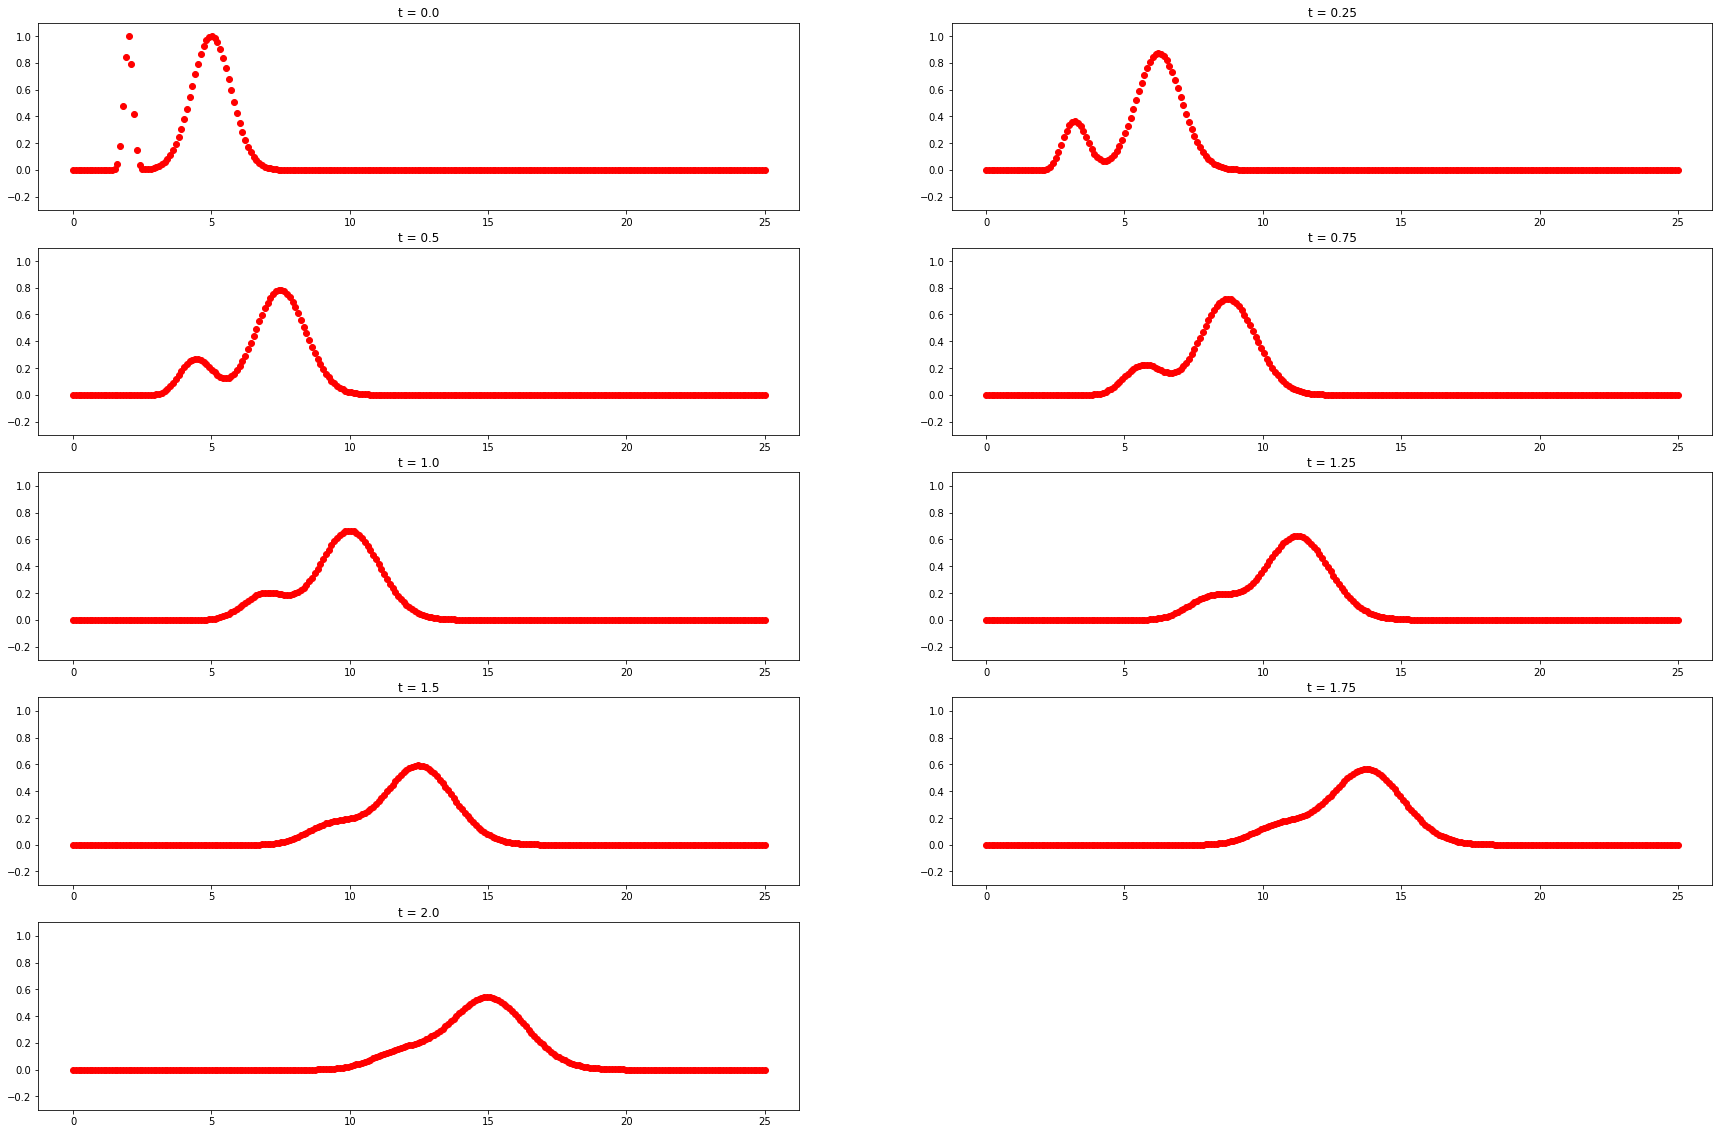

In [3]:
# Solve the advection-diffusion equation u_t + u_x = u_{xx}
import scipy.sparse as sparse
import scipy.sparse.linalg as linalg

def CN_step(delta_x, delta_t, t_0, U_0, kappa=1.0):
    """Solve the heat equation u_t = \kappa u_{xx}"""
    
    # Build solving matrix
    m = U_0.shape[0]
    r = 0.5 * kappa * delta_t / delta_x**2
    e = numpy.ones(m + 1) * r
    D2 = sparse.spdiags([e ,-2.0 * e, e], [-1, 0, 1], m, m).tolil()
    D2[0, -1] = r
    D2[-1, 0] = r
    I = sparse.eye(m)
    A1 = (I - D2).tocsr()
    A2 = (I + D2).tolil()
    
    # Construct right-hand side
    b = A2.dot(U_0.copy())
    
    # Solve system
    return linalg.spsolve(A1, b)

def LW_step(delta_x, delta_t, t_0, U_0, a):
    """Solve the advection equation u_t + a u_x = 0"""

    U = numpy.empty(U_0.shape)
    
    U[0] = U_0[0] - a * delta_t / (2.0 * delta_x) * (U_0[1] - U_0[-1]) \
                    + a * delta_t**2 / (2.0 * delta_x**2) * (U_0[1] - 2.0 * U_0[0] + U_0[-1])
    U[1:-1] = U_0[1:-1] - a * delta_t / (2.0 * delta_x) * (U_0[2:] - U_0[:-2]) \
                          + a * delta_t**2 / (2.0 * delta_x**2) * (U_0[2:] - 2.0 * U_0[1:-1] + U_0[:-2])
    U[-1] = U_0[-1] - a * delta_t / (2.0 * delta_x) * (U_0[0] - U_0[-2]) \
                      + a * delta_t**2 / (2.0 * delta_x**2) * (U_0[0] - 2.0 * U_0[-1] + U_0[-2])
    
    return U

# Problem specification
L = 25.0
a = 5.0
kappa = 0.5

# Spatial discretization
m = 250
x = numpy.linspace(0.0, L, m)
delta_x = L / (m + 1.0)
    
# Time discretization
C = 1.0
delta_t = C * delta_x / a

# Initial Condition
U = numpy.exp(-20.0 * (x - 2.0)**2) + numpy.exp(-(x - 5.0)**2)

# Godunov operator-splitting
t = 0.0
TOLERANCE = 1e-8
output_times = [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0]

# output_times = (10.0 * delta_t, 100.0 * delta_t, 200.0 * delta_t, 300.0 * delta_t, 400.0 * delta_t)
N = int(numpy.ceil((len(output_times) + 1) / 2.0))
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * N)
fig.set_figheight(fig.get_figheight() * N)
axes = fig.add_subplot(N, 2, 1)
axes.plot(x, U, 'ro')
axes.set_ylim((-0.3, 1.1))
axes.set_title("t = %s" % 0.0)

for (n, t_final) in enumerate(output_times):
    while t_final - t > TOLERANCE:
        
        # Take time step on Crank-Nickolson
        U = CN_step(delta_x, delta_t, t, U, kappa)
        
        # Take time step on Lax-Wendroff
        U = LW_step(delta_x, delta_t, t, U, a)

        
        # Complete time step and choose new delta_t based on CFL from advection step
        t += delta_t
        delta_t = min(delta_x / a, t_final - t)
    
    axes = fig.add_subplot(N, 2, n + 2)
    axes.plot(x, U, 'ro')
    axes.set_ylim((-0.3, 1.1))
    axes.set_title("t = %s" % t)

## Implicit-Explicit (IMEX) Methods 

Suppose that one of our operators $\mathcal{A}(u)$ represents stiff terms that we really would rather integrate using an implicit method while $\mathcal{B}(u)$ is non-stiff and we would like to apply an explicit method.  Instead of employing a fractional step method we can an *implicit-explicit* (IMEX) method.  These have the advantage that they are fully coupled (hence no splitting error) and are designed to be able to choose which terms to treat explicitly and which implicitly.

One simple example of this is combining backward and forward Euler, evaluating the non-stiff terms at $U^n$ and the stiff terms at $U^{n+1}$ to find
$$
    U^{n+1} = U^n + \Delta t (\mathcal{A}(U^{n+1}) + \mathcal{B}(U^n)).
$$

Another example that is second-order using Adams-Bashforth for the explicit component and the trapezoidal rule for the implicit leads to
$$
    U^{n+1} = U^n + \frac{\Delta t}{2} \left(\mathcal{A}(U^n) + \mathcal{A}(U^{n+1}) + 3 \mathcal{B}(U^n) - \mathcal{B}(U^{n-1}) \right ).
$$

In general we can combine many of the methods we have studied to form these types of methods including both multi-step methods like the previous example and Runge-Kutta like, multi-stage methods.

## Exponential Time Differencing Methods

For the final method we will look at consider the general nonlinear ODE
$$
    u' = f(u)
$$
and over the time interval $t \in [t_n, t_{n+1}]$ we write this ODE as
$$
    u'(t) = A_n u(t) + \mathcal{B}_n(u(t))
$$
where our notation suggests that $A_n$ is a matrix and therefore the first term is linear while the second term may not be and in general contains the nonlinearities from the original ODE.

The basic idea of *exponential time differencing* (ETD) methods is to apply exact solution techniques (such as Duhamel's principle) to handle the linear part and a numerical method for the nonlinear part.  It is often common to let the linear part contain the stiff components of the equation (such as if we discretized a diffusion operator) and then use an explicit method to handle $\mathcal{B}_n$.

We can arrive at this splitting in two common ways:
1. Let $A_n = f'(U^n)$ (the Jacobian) and then let
$$
    \mathcal{B}_n(u) = f(u) - A_n u.
$$
1. If we know more about the structure of $f(u)$ we can leverage its structure to build $A_n$ and $\mathcal{B}_n$.  Consider for example if we had an advection-diffusion problem, if we discretize only the diffusion operator and set this to $A_n$ and let the (possibly nonlinear) advection terms be $\mathcal{B}$.  The same applies to reaction-diffusion for non-stiff reaction terms.

From here we compute the matrix exponential to solve the $A_n$ part of the problem and use this to evaluate the explicit problem via a numerical method.  Note that if $A_n$ is constant we can actually compute the matrix exponential once and continue to apply it without any extra computation. 

So how does this work?  Consider Duhamel's principle in the case we have proposed:
$$
    u(t_{n+1}) = e^{A_n \Delta t} u(t_n) + \int^{t_{n+1}}_{t_n} e^{A_n (t_{n+1} - \tau)} \mathcal{B}_n(u(\tau)) d\tau.
$$
We must approximate the integral due to $\mathcal{B}_n(u(\tau))$.  There are of course multiple ways to approach the approximation to varying orders but let's consider the first order method where we simply evaluate $\mathcal{B}_n(U^n)$ and pull it out of the integral and evaluate the matrix exponential of the integral to find
$$\begin{aligned}
    \int^{t_{n+1}}_{t_n} e^{A_n (t_{n+1} - \tau)} d\tau &= \Delta t + \frac{\Delta t^2}{2} A_n + \frac{\Delta t^3}{6} A^2_n + \cdots \\
    &= A^{-1}_n \left( e^{A_n \Delta t} - I \right)
\end{aligned}$$
assuming $A_n$ is non-singular.

From here we can obtain the numerical method
$$
    U^{n+1} = e^{A_n \Delta t} U^n + A^{-1}_n \left( e^{A_n \Delta t} - I \right) \mathcal{B}_n(U^n).
$$
In the first, more general case above we can write 
$$
    \mathcal{B}(U^n) = f(U^n) - A_n U^n
$$
we can rewrite the above as
$$
    U^{n+1} = U^n + A^{-1}_n \left( e^{A_n \Delta t} - I \right) f(U^n).
$$
Here we can also identify this as related to forward Euler as the case where $A_n = 0$ reduces to exactly forward Euler.

We can compute the truncation error as
$$\begin{aligned}
    \tau^n &= \left(\frac{u(t_{n+1}) - u(t_n)}{\Delta t}\right ) - \frac{1}{\Delta t} A^{-1}_n \left(e^{A_n \Delta t} - I \right ) u'(t_n) \\
    &= \left[ u'(t_n) + \frac{\Delta t}{2} u''(t_n) + \frac{\Delta t^2}{6} u'''(t_n) + \cdots \right ] - \left[ I + \frac{\Delta t}{2} A_n + \frac{\Delta t^2}{6} A^2_n + \cdots \right ] u'(t_n) \\
    &= \frac{\Delta t}{2} (u''(t_n) - A_n u'(t_n)) + \frac{\Delta t^2}{6} (u'''(t_n) - A_n u'(t_n)) + \cdots \\
    &= \frac{\Delta t}{2} (f'(u(t_n)) - A_n) u'(t_n) + \mathcal{O}(\Delta t^2)
\end{aligned}$$
therefore the method is second order accurate if $A_n \equiv f'(U^n)$.

We can of course use higher-order methods to approximate the integral including multi-step methods (i.e. using an interpolating polynomial in time) or multi-stage Runge-Kutta like methods.

Equations that have dispersive terms in them, such as the KdV equation
$$
    u_t + uu_x = u_{xxx}
$$
can be particularly amenable to this approach.
Note that here the linear operator would be the dispersive term and using the ETD approach, trying to solve this term exactly, has a huge advantage over attempting to solve this term numerically.